In [56]:
#load the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data

In [82]:
data = pd.read_csv('train.csv', index_col=0)

In [15]:
print("Number of observation in train data:", data.shape[0])

Number of observation in train data: 80176


In [7]:
test = pd.read_csv('test.csv', index_col=0)

In [16]:
print("Number of observation in test data:", test.shape[0])

Number of observation in test data: 34365


In [8]:
data.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
0,"Mon, 6 Nov 2017 11:13:45 +0100",reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027,2
1,"Wed, 14 Feb 2018 11:00:16 -0000",edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961,1
2,"Wed, 6 Jul 2016 19:53:37 +0000",usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149,1
3,"Fri, 11 Oct 2019 11:25:40 +0200",granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296,1
4,"Tue, 07 Nov 2017 11:07:18 +0000 (UTC)",github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355,1


# Data quality check

## Duplicates

In [44]:
#check for full duplicates in train data

fullduplicates = data[data.duplicated()]
print("Number of duplicate rows in train data:", fullduplicates.shape[0])

Number of duplicate rows in train data: 10620


In [45]:
#check for duplicates in test data

testduplicates = test[test.duplicated()]
print("Number of duplicate rows in test data:", testduplicates.shape[0])

Number of duplicate rows in test data: 6425


In [46]:
#check for noisy labels (same attributes, different labels)

no_dupl = data.drop_duplicates() #drop full duplicates
noisy_lbl = no_dupl.drop(columns = ['label']) #drop the label column
noisy_lbl = noisy_lbl[noisy_lbl.duplicated(keep=False)]
print("Total number of rows that have noisy labels:", noisy_lbl.shape[0])

Total number of rows that have noisy labels: 40437


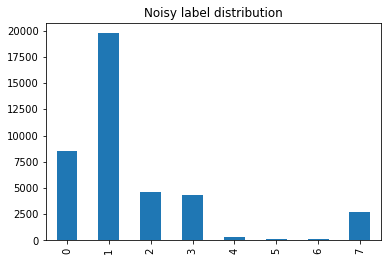

In [63]:
#see which labels are noisy

rows = noisy_lbl.index
duplicated = no_dupl.loc[rows,]

order_lbl = [0, 1, 2, 3, 4, 5, 6, 7]
lbl_count = duplicated.label.value_counts().loc[order_lbl]
lbl_count.plot(kind='bar', title='Noisy label distribution')

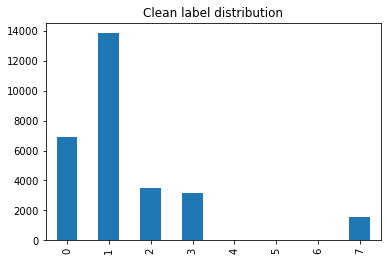

In [75]:
#versus total number of labels

clean = no_dupl.drop(index=rows)
lbl_clean = clean.label.value_counts().loc[order_lbl]
lbl_clean.plot(kind='bar', title='Clean label distribution')

Here noisy labels have the same distribution as clean labels

## Missing values

In [83]:
#check which columns have missing values in train data

no_dupl.isnull().sum()

date                   0
org                 3171
tld                 3173
ccs                    0
bcced                  0
mail_type            165
images                 0
urls                   0
salutations            0
designation            0
chars_in_subject      13
chars_in_body          0
label                  0
dtype: int64

In [77]:
#check which columns have missing values in test data

test.isnull().sum()

date                   0
org                 1536
tld                 1536
ccs                    0
bcced                  0
mail_type             80
images                 0
urls                   0
salutations            0
designation            0
chars_in_subject       6
chars_in_body          0
dtype: int64

# Variable exploration

In [114]:
#summary of the data types

no_dupl.dtypes

date                 object
org                  object
tld                  object
ccs                   int64
bcced                 int64
mail_type            object
images                int64
urls                  int64
salutations           int64
designation           int64
chars_in_subject    float64
chars_in_body         int64
label                 int64
dtype: object

## Target

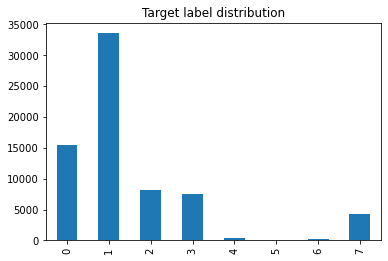

In [115]:
#show class distribution in train data

order_lbl = [0, 1, 2, 3, 4, 5, 6, 7]
label_count = no_dupl.label.value_counts().loc[order_lbl]
label_count.plot(kind='bar', title='Target label distribution')

## Numeric attributes

In [116]:
#summary of the numeric data

no_dupl.drop(columns = ['label']).describe()

,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body
count,69556.000000,69556.000000,69556.000000,69556.000000,69556.000000,69556.000000,69543.000000,6.955600e+04
mean,0.419849,0.002573,8.596455,36.825565,0.388665,0.104693,52.903340,1.919548e+05
std,2.965617,0.050664,327.895784,102.018174,0.487450,0.306159,34.219885,1.870509e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00
25%,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,33.000000,5.165000e+03
50%,0.000000,0.000000,3.000000,19.000000,0.000000,0.000000,44.000000,2.136500e+04
75%,0.000000,0.000000,9.000000,48.000000,1.000000,0.000000,64.000000,4.837100e+04
max,179.000000,1.000000,83481.000000,21540.000000,1.000000,1.000000,606.000000,7.438108e+07


Emails with 10 or less ccs: ccs    69334
dtype: int64
Emails with more than 10 ccs: ccs    222
dtype: int64


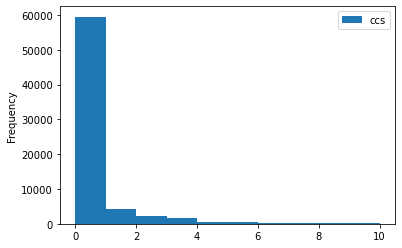

In [142]:
#distribution of number of cc'ed individuals below 10 and above 10

ccs = no_dupl[['ccs']]
ccs.plot.hist(bins=10, range = (0,10))

ccs_under_10 = ccs[ccs['ccs']<=10].count()
ccs_over_10 = ccs[ccs['ccs']>10].count()

print("Emails with 10 or less ccs:", ccs_under_10)
print("Emails with more than 10 ccs:", ccs_over_10)

Emails with 40 or less images: images    68566
dtype: int64
Emails with more than 40 images: images    990
dtype: int64


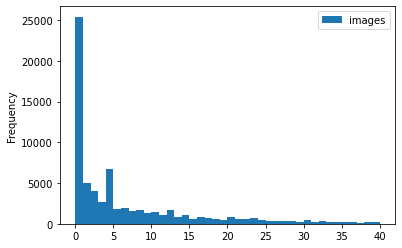

In [143]:
#distribution of number of images below 40 and above 40

images = no_dupl[['images']]
images.plot.hist(bins=40, range = (0,40))

img_under_40 = images[images['images']<=40].count()
img_over_40 = images[images['images']>40].count()

print("Emails with 40 or less images:", img_under_40)
print("Emails with more than 40 images:", img_over_40)

Emails with 200 or less urls: urls    68441
dtype: int64
Emails with more than 200 urls: urls    1115
dtype: int64


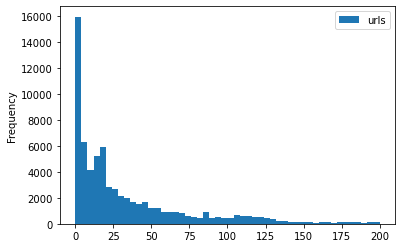

In [144]:
#distribution of number of urls below 200 and above 200

urls = no_dupl[['urls']]
urls.plot.hist(bins=50, range = (0,200))

urls_under_200 = urls[urls['urls']<=200].count()
urls_over_200 = urls[urls['urls']>200].count()

print("Emails with 200 or less urls:", urls_under_200)
print("Emails with more than 200 urls:", urls_over_200)

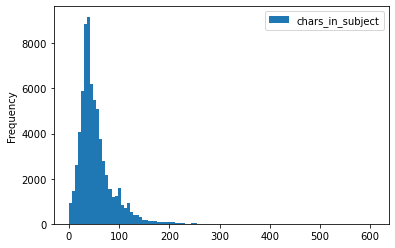

In [145]:
#distribution of characters in subjects


no_dupl[['chars_in_subject']].plot.hist(bins=100)

Emails with 100000 or less characters in body: chars_in_body    63287
dtype: int64
Emails with more than 100000 characters in body: chars_in_body    6269
dtype: int64


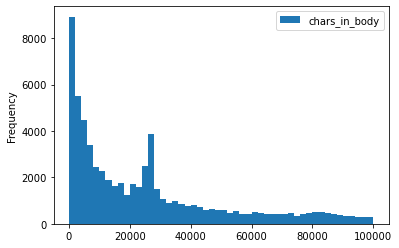

In [146]:
#distribution of number of characters in body below 60000 and above 60000

chars = no_dupl[['chars_in_body']]
chars.plot.hist(bins=50, range = (0,100000))

chars_under_100000 = chars[chars['chars_in_body']<=100000].count()
chars_over_100000 = chars[chars['chars_in_body']>100000].count()

print("Emails with 100000 or less characters in body:", chars_under_100000)
print("Emails with more than 100000 characters in body:", chars_over_100000)

## Boolean attributes

bcced
0    69377
1      179
dtype: int64

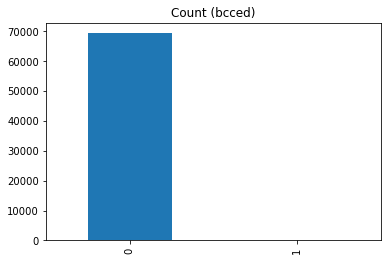

In [121]:
#distribution of bcc'ed flag (True/False)

bcced_count = no_dupl.bcced.value_counts()
bcced_count.plot(kind='bar', title='Count (bcced)')
no_dupl.groupby(['bcced']).size()

salutations
0    42522
1    27034
dtype: int64

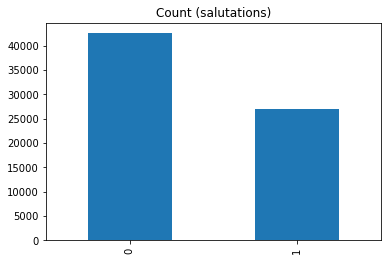

In [125]:
#distribution of salutation flag (True/False)

salutations_count = no_dupl.salutations.value_counts()
salutations_count.plot(kind='bar', title='Count (salutations)')
no_dupl.groupby(['salutations']).size()

designation
0    62274
1     7282
dtype: int64

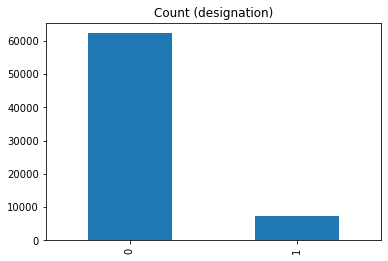

In [126]:
#distribution of designation flag (True/False)

designation_count = no_dupl.designation.value_counts()
designation_count.plot(kind='bar', title='Count (designation)')
no_dupl.groupby(['designation']).size()

## Categorical attributes

In [132]:
#top organizations

no_dupl.groupby(['org']).size().nlargest(20)

org
iiitd              15347
usebackpack         3967
google              3372
amazon              3112
quora               2143
twitter             2078
linkedin            1990
youtube             1146
github              1049
gmail               1025
centralesupelec      875
topcoder             724
coursera             720
phpclasses           667
flipkartletters      641
udacity              555
mailer               550
medium               540
granular             499
nvidia               492
dtype: int64

In [131]:
#top domains

no_dupl.groupby(['tld']).size().nlargest(20)

tld
com                  31054
ac.in                15426
in                    3721
org                   3260
fr                    1464
co.in                  697
gov.in                 651
ai                     642
netflix.com            533
net                    455
foodpanda.in           404
ebay.in                392
google.com             365
intercom-mail.com      293
grammarly.com          277
mail.coursera.org      272
co                     262
microsoft.com          231
speakingtree.in        229
bookmyshow.com         224
dtype: int64

In [124]:
#mail types

no_dupl.groupby(['mail_type']).size()

mail_type
Multipart/Alternative        3
Multipart/Mixed             39
Text/Html                   10
multipart/IDM                1
multipart/alternative    50379
multipart/mixed           5543
multipart/related         1647
multipart/report            12
multipart/signed            25
text/calendar                2
text/html                 9294
text/html                   58
text/plain                2378
dtype: int64

## New features

If additional features are created, they can be implemented and explored here.

In [147]:
#create day of the week, hour, and month elements


hours=[]
day=[]
month=[]
dates = no_dupl[['date']].date
for element in dates:
    splited = element.split(" ")
    if len(splited)>=6:
        hrs = splited[4].split(":")
        hr= hrs[0]
        if len(hr)==2:
            hours.append(hr)
        else: 
            hours.append(None)
    elif len(splited)>=4:
        hrs = splited[3].split(":")
        hr= hrs[0]
        if len(hr)==2:
            hours.append(hr)
        else: 
            hours.append(None)
    else:
        hours.append(None)
  
    d = splited[0]
    if len(d)==4:
        day.append(d[:-1])
    else:
        day.append(None)
    if len(splited)>=3:
        if len(splited[2])==3:
            month.append(splited[2])
        else: 
            month.append(None)
    else:
        month.append(None)



#insert the new columns

no_dupl.insert(2,"Hour",hours)
no_dupl.insert(3,"Day",day)
no_dupl.insert(4,"Month",month)

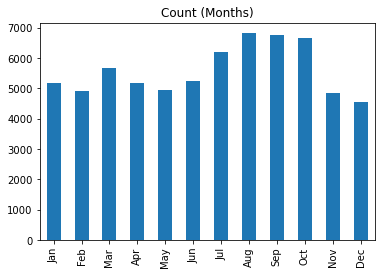

In [148]:
#months distribution

order_mn = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_count = no_dupl.Month.value_counts().loc[order_mn]
month_count.plot(kind='bar', title='Count (Months)')

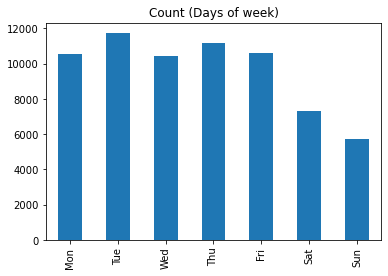

In [149]:
#days of the week distribution

order_w = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_count = no_dupl.Day.value_counts().loc[order_w]
weekday_count.plot(kind='bar', title='Count (Days of week)')

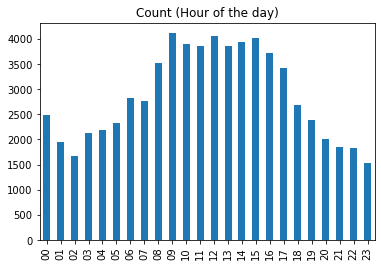

In [150]:
#hours distribution

order_hr = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hour_count = no_dupl.Hour.value_counts().loc[order_hr]
hour_count.plot(kind='bar', title='Count (Hour of the day)')